In [4]:
import numpy as np
import pandas as pd

In [5]:
import xarray as xr
DS = xr.open_dataset("first_data.nc")
#DS.to_dataframe().to_csv("first_data.csv")

In [6]:
DS


<xarray.Dataset>
Dimensions:   (time: 108, XC: 2160, YC: 588)
Coordinates:
    iter      (time) int64 ...
  * time      (time) datetime64[ns] 2013-01-30T20:40:00 ... 2021-12-30T22:20:00
  * XC        (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.6 359.8 359.9
  * YC        (YC) float32 -77.98 -77.95 -77.91 -77.88 ... -30.02 -29.87 -29.72
    rA        (YC, XC) float32 ...
    Depth     (YC, XC) float32 ...
    rLowC     (YC, XC) float32 ...
    maskInC   (YC, XC) bool ...
    rSurfC    (YC, XC) float32 ...
Data variables:
    oceSPflx  (time, YC, XC) float32 ...

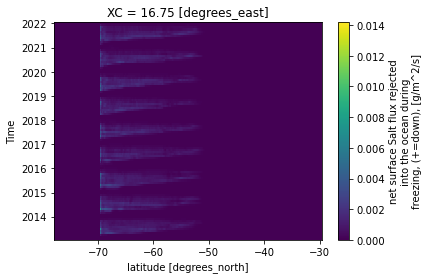

In [18]:
DS.oceSPflx[:,:,100].plot()

In [20]:
DS.XC.values


array([8.3333336e-02, 2.5000000e-01, 4.1666669e-01, ..., 3.5958334e+02,
       3.5975000e+02, 3.5991669e+02], dtype=float32)

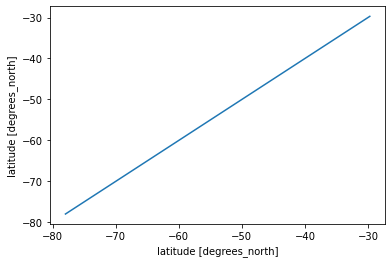

In [23]:
DS.YC.plot()

In [3]:
df = pd.read_csv('first_data.csv')
df.head()

,time,XC,YC,iter,rA,Depth,rLowC,maskInC,rSurfC,oceSPflx
0,2013-01-30 20:40:00,0.083333,-77.982651,4382,14884064.0,0.0,0.0,False,0.0,0.0
1,2013-01-30 20:40:00,0.083333,-77.947899,4382,14969052.0,0.0,0.0,False,0.0,0.0
2,2013-01-30 20:40:00,0.083333,-77.913048,4382,15054399.0,0.0,0.0,False,0.0,0.0
3,2013-01-30 20:40:00,0.083333,-77.878098,4382,15140538.0,0.0,0.0,False,0.0,0.0
4,2013-01-30 20:40:00,0.083333,-77.843056,4382,15226606.0,0.0,0.0,False,0.0,0.0


In [4]:
df.isnull().sum()

time        0
XC          0
YC          0
iter        0
rA          0
Depth       0
rLowC       0
maskInC     0
rSurfC      0
oceSPflx    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137168640 entries, 0 to 137168639
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   time      object 
 1   XC        float64
 2   YC        float64
 3   iter      int64  
 4   rA        float64
 5   Depth     float64
 6   rLowC     float64
 7   maskInC   bool   
 8   rSurfC    float64
 9   oceSPflx  float64
dtypes: bool(1), float64(7), int64(1), object(1)
memory usage: 9.3+ GB


In [6]:
df.eq(0).sum()

time               0
XC                 0
YC                 0
iter               0
rA                 0
Depth       35511264
rLowC       35511264
maskInC     35511264
rSurfC      73540764
oceSPflx    97931908
dtype: int64

In [7]:
df.shape

(137168640, 10)

In [8]:
df.eq(1).sum()

time                0
XC                  0
YC                  0
iter                0
rA                  0
Depth               0
rLowC               0
maskInC     101657376
rSurfC              0
oceSPflx            0
dtype: int64

In [9]:
df.corr()

,XC,YC,iter,rA,Depth,rLowC,maskInC,rSurfC,oceSPflx
XC,1.000000e+00,-2.392764e-15,-3.025832e-13,4.370370e-15,6.854000e-02,-6.854000e-02,1.601890e-01,2.382898e-02,0.078071
YC,-2.392764e-15,1.000000e+00,-1.397462e-14,9.957248e-01,5.477529e-01,-5.477529e-01,4.932409e-01,3.551603e-01,-0.232225
iter,-3.025832e-13,-1.397462e-14,1.000000e+00,6.323017e-13,-8.890594e-14,8.890594e-14,-1.527599e-13,5.798825e-15,-0.011271
rA,4.370370e-15,9.957248e-01,6.323017e-13,1.000000e+00,5.029856e-01,-5.029856e-01,4.488157e-01,3.257233e-01,-0.233918
Depth,6.854000e-02,5.477529e-01,-8.890594e-14,5.029856e-01,1.000000e+00,-1.000000e+00,7.857449e-01,7.880174e-01,-0.044539
rLowC,-6.854000e-02,-5.477529e-01,8.890594e-14,-5.029856e-01,-1.000000e+00,1.000000e+00,-7.857449e-01,-7.880174e-01,0.044539
maskInC,1.601890e-01,4.932409e-01,-1.527599e-13,4.488157e-01,7.857449e-01,-7.857449e-01,1.000000e+00,4.691969e-01,0.191286
rSurfC,2.382898e-02,3.551603e-01,5.798825e-15,3.257233e-01,7.880174e-01,-7.880174e-01,4.691969e-01,1.000000e+00,-0.063819
oceSPflx,7.807109e-02,-2.322252e-01,-1.127140e-02,-2.339183e-01,-4.453929e-02,4.453929e-02,1.912857e-01,-6.381895e-02,1.000000


In [10]:
import seaborn as sns

<AxesSubplot:>

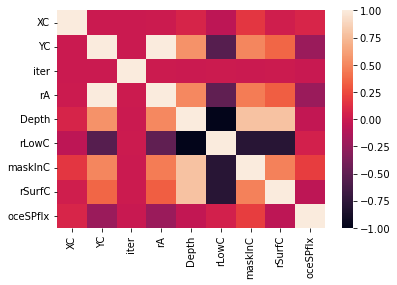

In [11]:
sns.heatmap(df.corr())

In [12]:
df.corr().nlargest(4, 'oceSPflx').index


Index(['oceSPflx', 'maskInC', 'XC', 'rLowC'], dtype='object')